# Use
This notebook will be used to tests the functions of the python files

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
from warnings import warn
%load_ext autoreload
%autoreload 2

from hungarian import preprocess, alternate, hungarian, hungarian3, augment
from transport import gaussian_transport, gaussian_discreatization

rng = np.random.default_rng(4321)

# `hungarian.py`
## `preprocess(C)`

In [2]:
n=4
C = np.random.random(size=(n,n))
n,U,V,row,x = preprocess(C)
print(C-U[:,np.newaxis]-V,"\n",x)

[[0.49198954 0.33383561 0.         0.06319988]
 [0.         0.         0.14055145 0.07568951]
 [0.28345933 0.         0.14031865 0.        ]
 [0.29760122 0.45125058 0.         0.09651858]] 
 [[False False  True False]
 [ True False False False]
 [False  True False False]
 [False False False False]]


In [3]:
# Exemple 4.3
n=4
C = np.array([[7,9,8,9],
              [2,8,5,7],
              [1,6,6,9],
              [3,6,2,2]])
n,U,V,row,x = preprocess(C)
print(C-U[:,np.newaxis] - V, row, U, V,"\n", x)

[[0 0 1 2]
 [0 4 3 5]
 [0 3 5 8]
 [1 2 0 0]] [0 None 3 None] [7 2 1 2] [0 2 0 0] 
 [[ True False False False]
 [False False False False]
 [False False False False]
 [False False  True False]]


seem ok
- The zero entries match the True entries
- Internal assertions satisfied
- Same results as exemple 4.3
## `alternate(C,U,V,row,k)`

In [4]:
n=4
C = np.random.randint(10,size=(n,n))
n,U,V,row,x = preprocess(C)
k=n-1
if np.any(row==k):
     print("Invalid candidate k, try again")
else:
    sink,pred,SU,LV = alternate(C,U,V,row,k)
    print(row)
    print(sink,pred,SU,LV)
    print(C-U[:,np.newaxis]-V)

Invalid candidate k, try again


In [5]:
# Exemple 4.3
n=4
C = np.array([[7,9,8,9],
              [2,8,6,7],
              [1,6,6,9],
              [3,6,2,2]])
n,U,V,row,x = preprocess(C)
k=1
sink,pred,SU,LV = alternate(C,U,V,row,k)
print(sink,pred)

1 [1 0 None None]


## `hungarian(C)`

In [6]:
# Exemple 4.3
n=4
C = np.array([[7,9,8,9],
              [2,8,6,7],
              [1,6,6,9],
              [3,6,2,2]])
row,x,phi,U,V,W = hungarian(C)
print(row,phi,U,V)
print(1*x)

hungarian succed (feasibility and complementary slackness holds)
[2 0 1 3] [1 2 0 3] [8 6 5 2] [-4  1  0  0]
[[0 1 0 0]
 [0 0 1 0]
 [1 0 0 0]
 [0 0 0 1]]


In [7]:
# random integer
n=10
C = np.random.randint(1,10,(n,n))
row,x,phi,U,V, W = hungarian(C)
print(row,phi,U,V)

hungarian succed (feasibility and complementary slackness holds)
[0 9 2 6 5 1 7 8 4 3] [0 5 2 9 8 4 3 6 7 1] [1 1 1 1 1 1 1 1 1 1] [0 0 1 0 0 0 0 0 0 1]


In [8]:
# random gaussian
n=4
C = np.random.random(size=(n,n))
row,x,phi,U,V,W = hungarian(C)
print(C)
print(C-U[:,np.newaxis]-V)
print(row,phi,U,V)
print(1*x)

hungarian succed (feasibility and complementary slackness holds)
[[0.96322647 0.78917081 0.06419616 0.29385053]
 [0.88968484 0.93426913 0.54512264 0.43879209]
 [0.19366315 0.53101025 0.43641665 0.07429923]
 [0.81806767 0.52423214 0.57589986 0.10146387]]
[[0.77966639 0.30220638 0.         0.22965436]
 [0.33152883 0.07270877 0.10633054 0.        ]
 [0.         0.03394276 0.36211742 0.        ]
 [0.59723988 0.         0.47443599 0.        ]]
[2 3 0 1] [2 3 0 1] [0.06419616 0.43879209 0.07429923 0.10146387] [0.11936392 0.42276827 0.         0.        ]
[[0 0 1 0]
 [0 0 0 1]
 [1 0 0 0]
 [0 1 0 0]]


In [9]:
# random gaussian
n=10
d=10
a=np.random.randn(d,n)
b=np.random.randn(d,n)
C = np.sum((a[:,:,np.newaxis]-b[:,np.newaxis,:])**2,axis=0)
#print(C)
row,x,phi,U,V,W = hungarian(C)
#print(C-U[:,np.newaxis]-V)
#print(row,phi,U,V)
#print(1*x)

hungarian succed (feasibility and complementary slackness holds)


## Questions/remarks
- We must test the **scalar equality** $u_i+v_j=c_{ij}$ multiple times, for now done with a tolerance of proximity but it's not very absolute and strong. How resolve? Solutions:
    - Use integers by **rescaling**.(the more we rescale the slower it becomes)
    - During the dual updating, **save the index** where the constrain is becoming active (by saving the argmin, see how to do it)
    
    -> it is indeed true with tolerance but wont affect the convergence of the algorithm neither the final output significantly

- implementation of **sets** by **vectors**. Better by python sets?

    -> we'll see, not so bad 

- describe the functionment of algorithm? a sketch of background?

    -> yes, sketch the idea, describe the steps, invariants, stopping situation.

- with floats, there is sometimes a small transgression of the dual feasibility, has been dealed by adding a tolerance `tol=1e-5`.

## `augment()`

In [10]:
n=4
C = np.random.randint(10,size=(n,n))
n,U,V,row,x = preprocess(C)
k=n-1
if np.any(row==k):
     print("Invalid candidate k, try again")
else:
    sink,pred,U,V = augment(C,U,V,row,k)
    print(sink,pred,U,V)
    print(C-U[:,np.newaxis]-V)

Invalid candidate k, try again


## `hungarian3()`

In [11]:
# Exemple 4.3
n=4
C = np.array([[7,9,8,9],
              [2,8,6,7],
              [1,6,6,9],
              [3,6,2,2]])
row,x,phi,U,V,W = hungarian3(C)
print(row,phi,U,V)
print(1*x)

hungarian3 succed (feasibility and complementary slackness holds)
[1 2 0 3] [2 0 1 3] [8 6 5 2] [-4  1  0  0]
[[0 0 1 0]
 [1 0 0 0]
 [0 1 0 0]
 [0 0 0 1]]


In [12]:
n=100
C = np.random.randint(10,size=(n,n))
row,x,phi,U,V,W = hungarian3(C)

hungarian3 succed (feasibility and complementary slackness holds)


# `transport.py`
## `gaussian_transport()`

In [13]:
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
from transport import gaussian_transport, gaussian_discreatization
rng = np.random.default_rng(4321)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Text(0.5, 1.0, 'Gaussian discretization, cond(cov2)=1.2454704099105134')

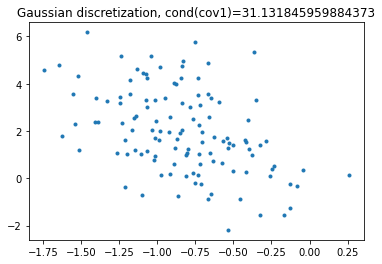

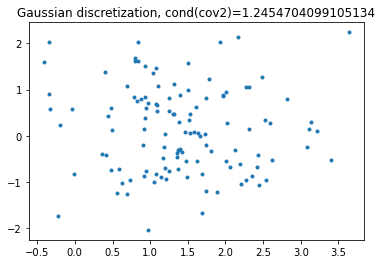

In [46]:
d = 2
n=120
mean1, mean2 = rng.normal(size=d), rng.normal(size=d)
A1, A2 = rng.normal(size=(d,d)), rng.normal(size=(d,d))
ii=np.arange(d)
jj=np.arange(d)[:,np.newaxis]
A1[ii-jj<0] = 0
A1[ii-jj==0] = np.abs(A1[ii-jj==0])

cov1, cov2 = A1.T @ A1, A2.T @ A2
transport, W_true = gaussian_transport(mean1, cov1, mean2, cov2)
mu, nu, C = gaussian_discreatization(mean1, cov1, mean2, cov2, n, rng)

plt.plot(mu[:,0],mu[:,1],'.')
plt.title("Gaussian discretization, cond(cov1)="+str(np.linalg.cond(cov1)))
plt.figure()
plt.plot(nu[:,0],nu[:,1],'.')
plt.title("Gaussian discretization, cond(cov2)="+str(np.linalg.cond(cov2)))

In [47]:
row,x,phi,U,V, W_hungarian = hungarian3(C)

hungarian3 succed (feasibility and complementary slackness holds)


W_true = 9.268400280160348
W_hungarian = 9.509034085732706
Error = 0.24063380557235803
cond(cov1)= 31.131845959884373 cond(cov12)= 1.2454704099105134


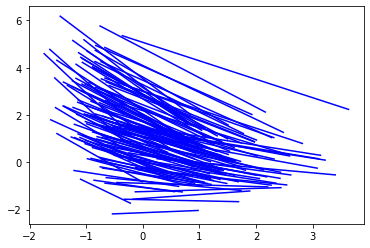

In [48]:
print("W_true =",W_true)
#transported_mu = np.array([transport(mu[:,i] for i in range(n))]).T
#W_true_discretized = np.sum((mu[:,np.newaxis,:] - transported_mu)**2, axis=2) / n
print("W_hungarian =",W_hungarian)
print("Error =",W_hungarian-W_true)
print("cond(cov1)=",np.linalg.cond(cov1),"cond(cov12)=",np.linalg.cond(cov2))
for i in range(n):
    plt.plot([mu[i,0],nu[phi[i],0]],[mu[i,1],nu[phi[i],1]],'blue')